In [8]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
import zipfile
import os

zip_path = r'C:\Users\Dell\Desktop\Mini Project\Datasets\cleaned_dataset_diabetic_retinopathy-20241221T165725Z-001.zip'
extract_to = r'C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images'

# Extract ZIP file
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted contents to {extract_to}")

# Update main_folder to the extracted directory
main_folder = os.path.join(extract_to, 'cleaned_dataset_diabetic_retinopathy', 'cleaned_dataset')  
print(f"Main folder set to: {main_folder}")
train_ratio = 0.8

Main folder set to: C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset


In [11]:
train_dir = 'train'
test_dir = 'test'

In [12]:

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [13]:
subfolders = [f for f in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, f))]


In [14]:
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    all_files = os.listdir(subfolder_path)
    random.shuffle(all_files)
    
    split_index = int(len(all_files) * train_ratio)
    train_files = all_files[:split_index]
    test_files = all_files[split_index:]
    

    train_subdir = os.path.join(train_dir, subfolder)
    test_subdir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    

    for file in train_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(train_subdir, file)
        try:
            shutil.copy(src, dst)
            print(f"Copied {src} to {dst}")
        except Exception as e:
            print(f"Error copying {src} to {dst}: {e}")
    

    for file in test_files:
        src = os.path.join(subfolder_path, file)
        dst = os.path.join(test_subdir, file)
        try:
            shutil.copy(src, dst)
            print(f"Copied {src} to {dst}")
        except Exception as e:
            print(f"Error copying {src} to {dst}: {e}")

Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\20910_right.jpeg to train\0\20910_right.jpeg
Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\38567_left.jpeg to train\0\38567_left.jpeg
Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\12620_right.jpeg to train\0\12620_right.jpeg
Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\37769_right.jpeg to train\0\37769_right.jpeg
Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\17546_left.jpeg to train\0\17546_left.jpeg
Copied C:\Users\Dell\Desktop\Mini Project\Datasets\extracted_images\cleaned_dataset_diabetic_retinopathy\cleaned_dataset\0\33680_left.jpeg to train\0\33680_left.jpe

In [15]:

batch_size = 32
image_size = (150, 150)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 45131 images belonging to 10 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15529 images belonging to 10 classes.


In [19]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10


1410/1410 [==============================] - 669s 473ms/step - loss: 0.9790 - accuracy: 0.6555 - val_loss: 0.9265 - val_accuracy: 0.6788
Epoch 2/10
1410/1410 [==============================] - 546s 387ms/step - loss: 0.9502 - accuracy: 0.6645 - val_loss: 0.9179 - val_accuracy: 0.6812
Epoch 3/10
1410/1410 [==============================] - 544s 386ms/step - loss: 0.9165 - accuracy: 0.6777 - val_loss: 0.9217 - val_accuracy: 0.6798
Epoch 4/10
1410/1410 [==============================] - 548s 389ms/step - loss: 0.8441 - accuracy: 0.7129 - val_loss: 0.9626 - val_accuracy: 0.6745
Epoch 5/10
1410/1410 [==============================] - 545s 386ms/step - loss: 0.7397 - accuracy: 0.7593 - val_loss: 1.1216 - val_accuracy: 0.6730
Epoch 6/10
1410/1410 [==============================] - 544s 386ms/step - loss: 0.6668 - accuracy: 0.7859 - val_loss: 1.2679 - val_accuracy: 0.6720
Epoch 7/10
1410/1410 [==============================] - 1395s 990ms/step - loss: 0.6421 - accuracy: 0.7938 - v

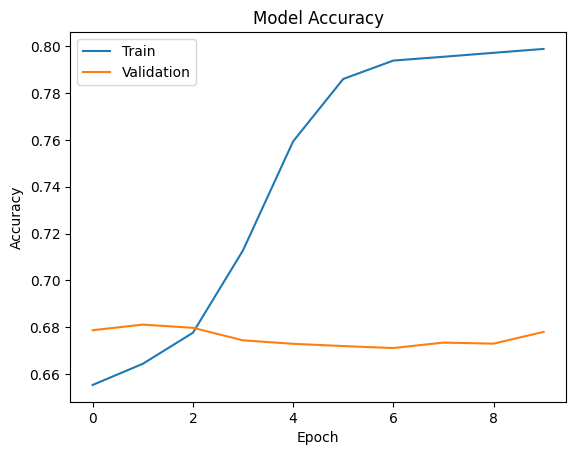

In [22]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

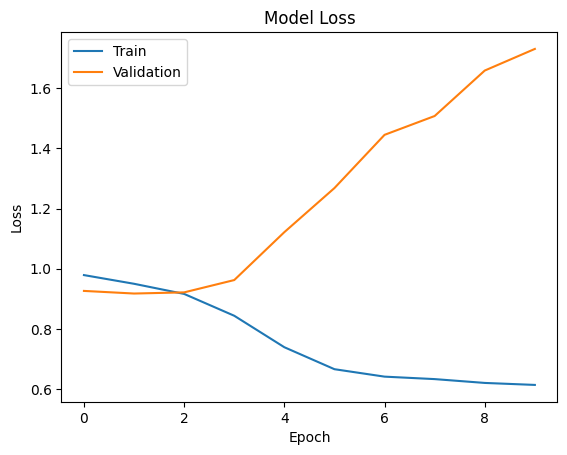

In [23]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Confusion Matrix
test_steps = len(test_generator)
predictions = model.predict(test_generator, steps=test_steps)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

486/486 [==============================] - 80s 163ms/step


In [25]:
class_names = list(train_generator.class_indices.keys())

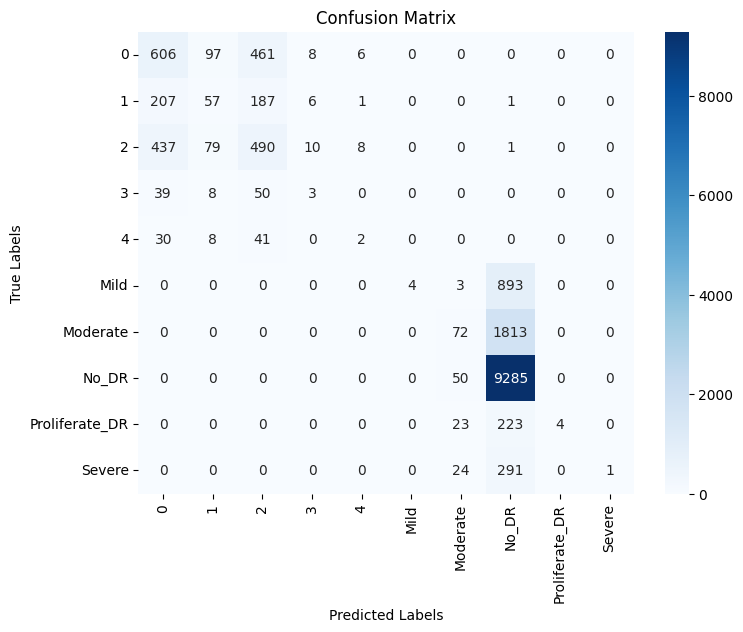

In [26]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()